<a href="https://colab.research.google.com/github/endangrusiana123/ReinforcementLearning/blob/main/TugasKelompok1_20241107.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Tugas 1: Multi Armed Bandit** <br>
Grup 1
1. Endang Rusiana
2. Muchammad 'Irfan Chanif Rusydi
3. Dimas Maulana

![Image Description](https://miro.medium.com/v2/resize:fit:720/format:webp/1*5q0Mihf29fftuXpKWWX2uA.png)


# Epsilon-Greedy

True Action Values for Each Arm:
Arm 0: 0.4967
Arm 1: -0.1383
Arm 2: 0.6477
Arm 3: 1.5230
Arm 4: -0.2342
Arm 5: -0.2341
Arm 6: 1.5792
Arm 7: 0.7674
Arm 8: -0.4695
Arm 9: 0.5426


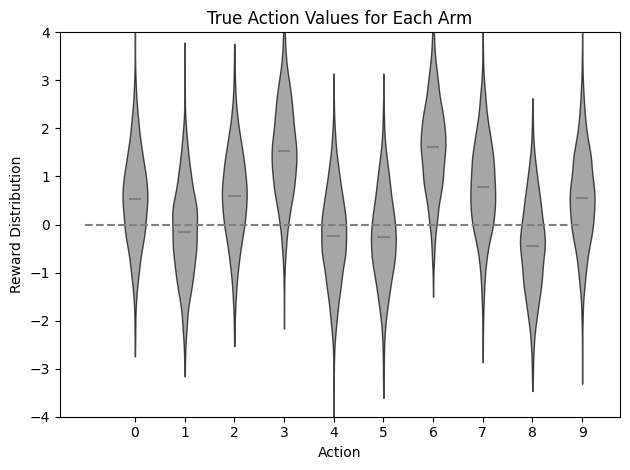

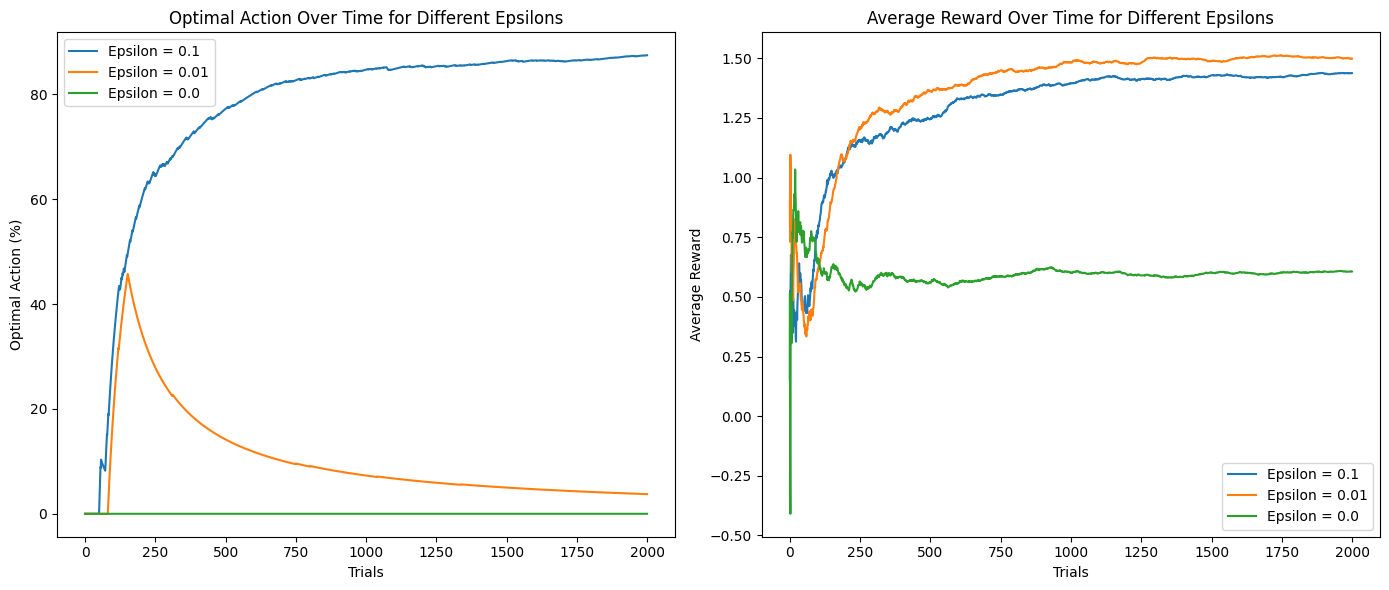

Average reward distribution for epsilon = 0.1:
Arm 0: 0.5400 average reward
Arm 1: -0.4417 average reward
Arm 2: 0.6792 average reward
Arm 3: 1.3470 average reward
Arm 4: -0.6355 average reward
Arm 5: 0.1019 average reward
Arm 6: 1.5816 average reward
Arm 7: 1.0512 average reward
Arm 8: -0.6554 average reward
Arm 9: 0.5584 average reward


Average reward distribution for epsilon = 0.01:
Arm 0: 0.4391 average reward
Arm 1: -1.5674 average reward
Arm 2: -0.0775 average reward
Arm 3: 1.5599 average reward
Arm 4: 0.4726 average reward
Arm 5: -0.7091 average reward
Arm 6: 1.4830 average reward
Arm 7: 0.4725 average reward
Arm 8: 0.0000 average reward
Arm 9: 0.1129 average reward


Average reward distribution for epsilon = 0.0:
Arm 0: -0.1746 average reward
Arm 1: -0.8781 average reward
Arm 2: 0.6082 average reward
Arm 3: 0.0000 average reward
Arm 4: 0.0000 average reward
Arm 5: 0.0000 average reward
Arm 6: 0.0000 average reward
Arm 7: 0.0000 average reward
Arm 8: 0.0000 average reward
Arm 9

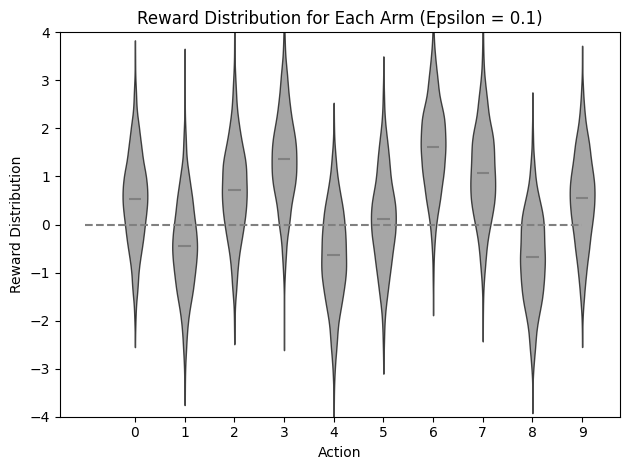

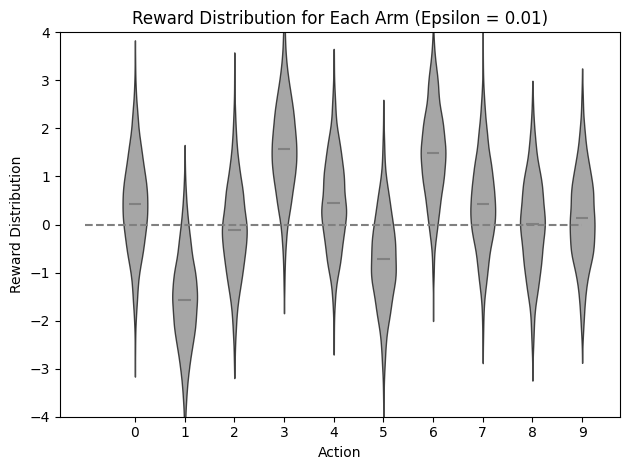

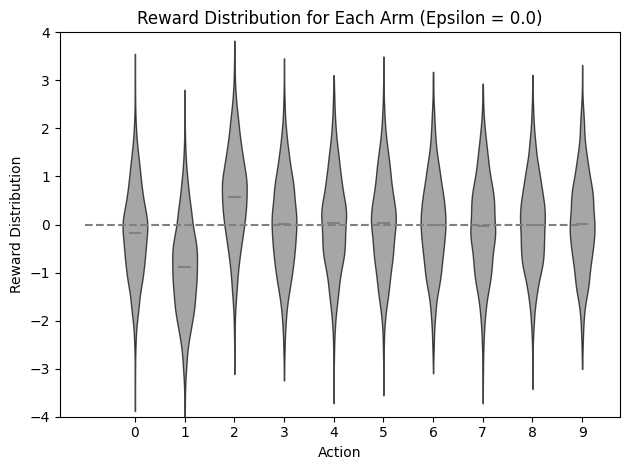

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Setting random seed for reproducibility
np.random.seed(42)

# Parameter setting
n_arms = 10  # number of arms
n_trials = 2000  # number of trials
epsilons = [0.1, 0.01, 0.0]  # list of epsilon values to compare

# Step 1: Generate true action values for each arm (q*(a)) from a normal distribution
true_action_values = np.random.normal(0, 1, n_arms)  # Mean = 0, Variance = 1
# Print the true probabilities for each arm
print("True Action Values for Each Arm:")
for arm in range(n_arms):
    print(f"Arm {arm}: {true_action_values[arm]:.4f}")

# Generate the violin plot using actual rewards from the simulation
fig = plt.figure()
ax = fig.add_subplot(111)

# Use rewards from the simulation for the violin plot
reward_samples = np.array([np.random.normal(true_action_values[arm], 1, n_trials) for arm in range(n_arms)]).T

# Create the violin plot
parts = ax.violinplot(reward_samples, showmeans=True, showextrema=False)

# Set color for each violin body
for pc in parts['bodies']:
    pc.set_facecolor('gray')  # Gray color for violins
    pc.set_edgecolor('black')  # Optional: adds border to violins
    pc.set_alpha(0.7)  # Optional: adjust transparency

# Set color for the mean marker
parts['cmeans'].set_color('gray')

# Add a horizontal dashed line at y=0
ax.plot([0, n_arms], [0, 0], color='gray', linestyle='--')

# Set y-axis limits
ax.set_ylim([-4, 4])

# Set x-axis ticks and labels explicitly to start from 0
ax.set_xticks(np.arange(1, n_arms + 1))  # Set ticks to match arm indices starting from 1
ax.set_xticklabels(np.arange(0, n_arms))  # Set labels to start from 0 (for arms)


# Add axis labels
ax.set_xlabel("Action")
ax.set_ylabel("Reward Distribution")
# Add a title for the plot (including epsilon value)
ax.set_title(f"True Action Values for Each Arm")

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

# Simulation for each epsilon value
results = {}

# Tracking reward distribution for each arm
average_reward_distribution = np.zeros((n_arms, len(epsilons)))
reward_distribution = np.zeros((n_arms, len(epsilons)))

for idx, epsilon in enumerate(epsilons):
    # Initialize statistics for wins and trials per arm
    wins = np.zeros(n_arms)
    trials = np.zeros(n_arms)
    optimal_action_counts = np.zeros(n_trials)
    rewards = np.zeros(n_trials)

    total_reward = 0
    for t in range(n_trials):
        # Exploration with epsilon probability
        if np.random.rand() < epsilon:
            chosen_arm = np.random.randint(0, n_arms)
        else:
            # Exploitation - pick the arm with the highest average reward
            average_reward = wins / (trials + 1e-10)  # Avoid division by zero
            chosen_arm = np.argmax(average_reward)

        # Step 2: Calculate the reward for the chosen arm
        reward = np.random.normal(true_action_values[chosen_arm], 1)  # Normal distribution with mean q*(a) and variance 1

        # Update statistics
        wins[chosen_arm] += reward
        trials[chosen_arm] += 1
        total_reward += reward

        # Store the rewards and optimal action
        rewards[t] = total_reward
        if chosen_arm == np.argmax(true_action_values):  # Optimal action is the one with the highest q*(a)
            optimal_action_counts[t] = 1  # Count as optimal action

    # Calculate the percentage of optimal actions and average rewards
    optimal_action_percentage = np.cumsum(optimal_action_counts) / (np.arange(1, n_trials + 1)) * 100
    average_rewards = rewards / (np.arange(1, n_trials + 1))

    # Save results for each epsilon
    results[epsilon] = (optimal_action_percentage, average_rewards)

    # Calculate average reward distribution for each arm and epsilon
    for arm in range(n_arms):
        if trials[arm] > 0:
            average_reward_distribution[arm, idx] = wins[arm] / trials[arm]  # Calculate average reward

# Plotting results
plt.figure(figsize=(14, 6))

# Plot percentage of Optimal Actions
plt.subplot(1, 2, 1)
for epsilon in epsilons:
    plt.plot(results[epsilon][0], label=f"Epsilon = {epsilon}")
plt.xlabel("Trials")
plt.ylabel("Optimal Action (%)")
plt.title("Optimal Action Over Time for Different Epsilons")
plt.legend()

# Plot average reward
plt.subplot(1, 2, 2)
for epsilon in epsilons:
    plt.plot(results[epsilon][1], label=f"Epsilon = {epsilon}")
plt.xlabel("Trials")
plt.ylabel("Average Reward")
plt.title("Average Reward Over Time for Different Epsilons")
plt.legend()

plt.tight_layout()
plt.show()

# Display average reward distribution for each arm
for idx, epsilon in enumerate(epsilons):
    print(f"Average reward distribution for epsilon = {epsilon}:")
    for arm in range(n_arms):
        print(f"Arm {arm}: {average_reward_distribution[arm, idx]:.4f} average reward")
    print("\n")

# Plotting reward distribution for each arm separately for each epsilon
for idx, epsilon in enumerate(epsilons):
    # Generate the violin plot using actual rewards from the simulation
    fig = plt.figure()
    ax = fig.add_subplot(111)

    # Use rewards from the simulation for the violin plot
    reward_samples = np.array([np.random.normal(average_reward_distribution[arm, idx], 1, n_trials) for arm in range(n_arms)]).T

    # Create the violin plot
    parts = ax.violinplot(reward_samples, showmeans=True, showextrema=False)

    # Set color for each violin body
    for pc in parts['bodies']:
        pc.set_facecolor('gray')  # Gray color for violins
        pc.set_edgecolor('black')  # Optional: adds border to violins
        pc.set_alpha(0.7)  # Optional: adjust transparency

    # Set color for the mean marker
    parts['cmeans'].set_color('gray')

    # Add a horizontal dashed line at y=0
    ax.plot([0, n_arms], [0, 0], color='gray', linestyle='--')

    # Set y-axis limits
    ax.set_ylim([-4, 4])

    # Set x-axis ticks and labels explicitly to start from 0
    ax.set_xticks(np.arange(1, n_arms + 1))  # Set ticks to match arm indices starting from 1
    ax.set_xticklabels(np.arange(0, n_arms))  # Set labels to start from 0 (for arms)


    # Add axis labels
    ax.set_xlabel("Action")
    ax.set_ylabel("Reward Distribution")
    # Add a title for the plot (including epsilon value)
    ax.set_title(f"Reward Distribution for Each Arm (Epsilon = {epsilon})")

    # Adjust layout and show the plot
    plt.tight_layout()
    plt.show()

# Upper Confidence Bound (UCB)

$$UCB(a) = \hat{Q}(a) + c \cdot \sqrt{\frac{\ln(t)}{N(a)}}$$

True Action Values for Each Arm:
Arm 0: 0.4967
Arm 1: -0.1383
Arm 2: 0.6477
Arm 3: 1.5230
Arm 4: -0.2342
Arm 5: -0.2341
Arm 6: 1.5792
Arm 7: 0.7674
Arm 8: -0.4695
Arm 9: 0.5426


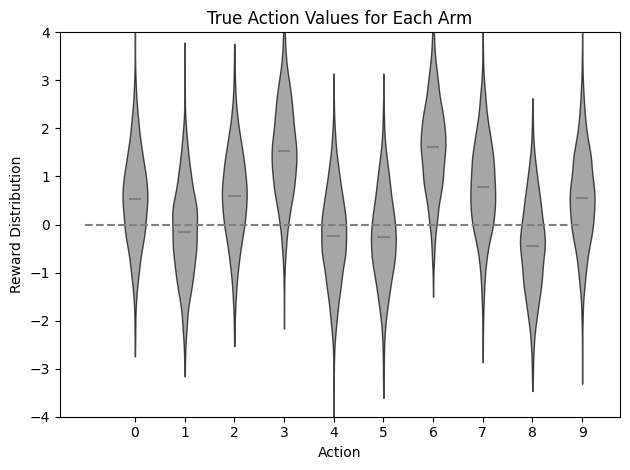

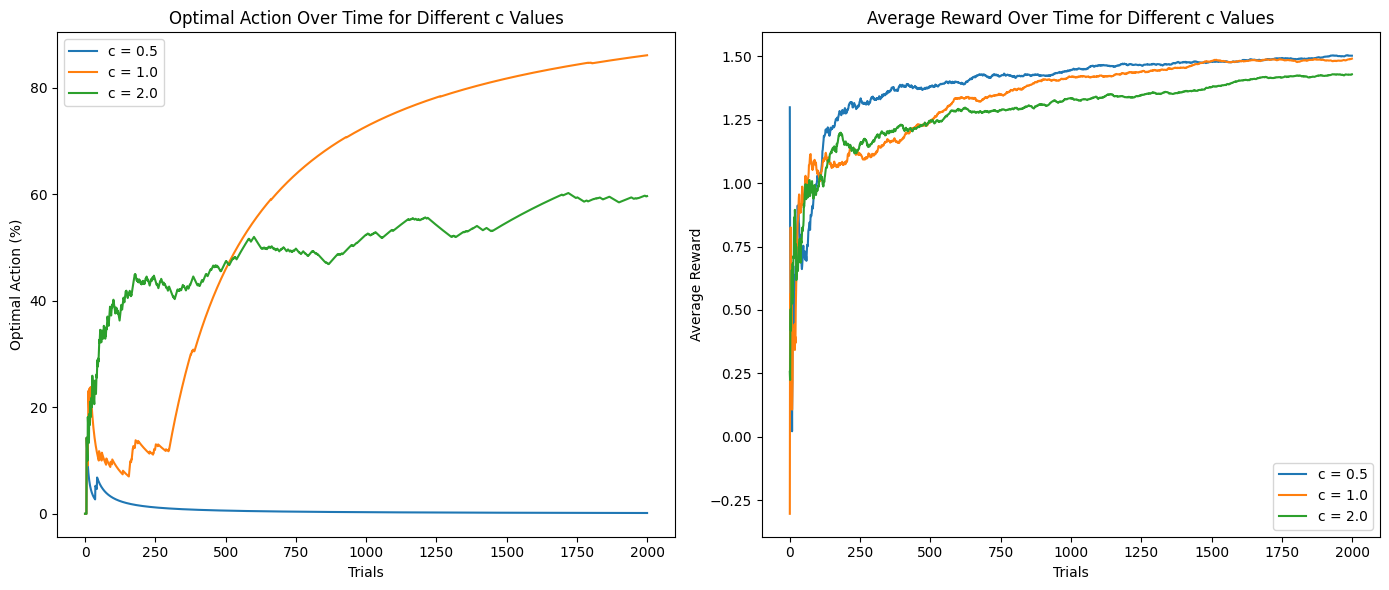

Average reward distribution for c = 0.5:
Arm 0: 0.5819 average reward
Arm 1: -0.3210 average reward
Arm 2: 0.8228 average reward
Arm 3: 1.5234 average reward
Arm 4: -0.2263 average reward
Arm 5: -0.0990 average reward
Arm 6: 0.3902 average reward
Arm 7: -0.7494 average reward
Arm 8: -1.4282 average reward
Arm 9: 0.8783 average reward


Average reward distribution for c = 1.0:
Arm 0: 0.9427 average reward
Arm 1: 0.3422 average reward
Arm 2: 0.4977 average reward
Arm 3: 1.3332 average reward
Arm 4: -0.2841 average reward
Arm 5: -0.7728 average reward
Arm 6: 1.5602 average reward
Arm 7: -1.2922 average reward
Arm 8: -2.6240 average reward
Arm 9: 0.3656 average reward


Average reward distribution for c = 2.0:
Arm 0: 0.6564 average reward
Arm 1: -0.3918 average reward
Arm 2: 0.3949 average reward
Arm 3: 1.4962 average reward
Arm 4: -0.8312 average reward
Arm 5: -0.1379 average reward
Arm 6: 1.5939 average reward
Arm 7: 0.6205 average reward
Arm 8: -0.3722 average reward
Arm 9: 0.5171 avera

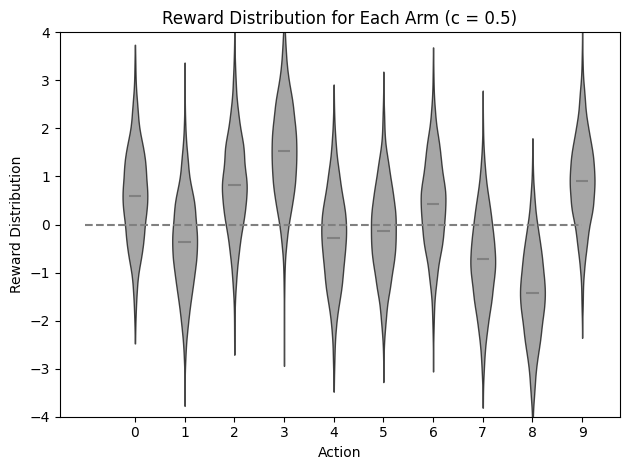

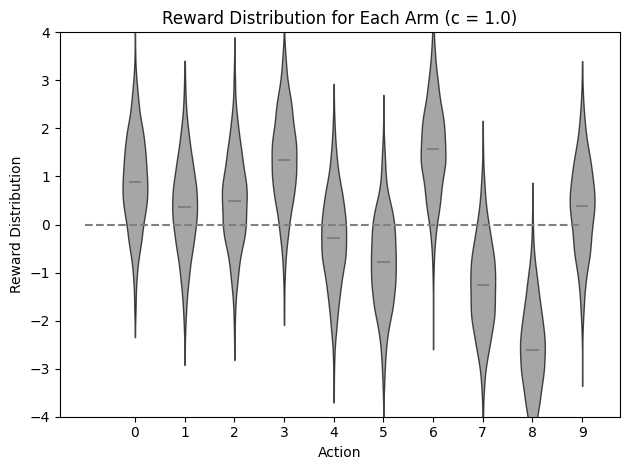

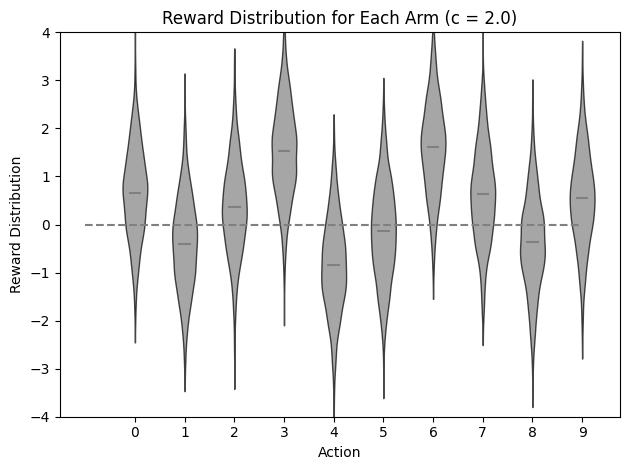

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Setting random seed for reproducibility
np.random.seed(42)

# Parameter setting
n_arms = 10  # number of arms
n_trials = 2000  # number of trials
c_values = [0.5, 1.0, 2.0]  # List of different c values to compare

# Step 1: Generate true action values for each arm (q*(a)) from a normal distribution
true_action_values = np.random.normal(0, 1, n_arms)  # Mean = 0, Variance = 1
# Print the true probabilities for each arm
print("True Action Values for Each Arm:")
for arm in range(n_arms):
    print(f"Arm {arm}: {true_action_values[arm]:.4f}")
# Generate the violin plot using actual rewards from the simulation
fig = plt.figure()
ax = fig.add_subplot(111)

# Use rewards from the simulation for the violin plot
reward_samples = np.array([np.random.normal(true_action_values[arm], 1, n_trials) for arm in range(n_arms)]).T

# Create the violin plot
parts = ax.violinplot(reward_samples, showmeans=True, showextrema=False)

# Set color for each violin body
for pc in parts['bodies']:
    pc.set_facecolor('gray')  # Gray color for violins
    pc.set_edgecolor('black')  # Optional: adds border to violins
    pc.set_alpha(0.7)  # Optional: adjust transparency

# Set color for the mean marker
parts['cmeans'].set_color('gray')

# Add a horizontal dashed line at y=0
ax.plot([0, n_arms], [0, 0], color='gray', linestyle='--')

# Set y-axis limits
ax.set_ylim([-4, 4])

# Set x-axis ticks and labels explicitly to start from 0
ax.set_xticks(np.arange(1, n_arms + 1))  # Set ticks to match arm indices starting from 1
ax.set_xticklabels(np.arange(0, n_arms))  # Set labels to start from 0 (for arms)


# Add axis labels
ax.set_xlabel("Action")
ax.set_ylabel("Reward Distribution")
# Add a title for the plot (including epsilon value)
ax.set_title(f"True Action Values for Each Arm")

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

# Initialize a dictionary to store results for each c value
results = {}

# Tracking reward distribution for each arm
average_reward_distribution = np.zeros((n_arms, len(c_values)))

for idx, c_value in enumerate(c_values):
    # Initialize statistics for wins and trials per arm
    wins = np.zeros(n_arms)
    trials = np.zeros(n_arms)
    optimal_action_counts = np.zeros(n_trials)
    rewards = np.zeros(n_trials)

    total_reward = 0
    for t in range(1, n_trials + 1):
        # Calculate UCB for each arm with the current c_value
        ucb_values = (wins / (trials + 1e-10)) + c_value * np.sqrt(2 * np.log(t) / (trials + 1e-10))

        # Choose the arm with the highest UCB
        chosen_arm = np.argmax(ucb_values)

        # Step 2: Calculate the reward for the chosen arm
        reward = np.random.normal(true_action_values[chosen_arm], 1)  # Normal distribution with mean q*(a) and variance 1

        # Update statistics
        wins[chosen_arm] += reward
        trials[chosen_arm] += 1
        total_reward += reward

        # Store the rewards and optimal action
        rewards[t - 1] = total_reward
        if chosen_arm == np.argmax(true_action_values):  # Optimal action is the one with the highest q*(a)
            optimal_action_counts[t - 1] = 1  # Count as optimal action

    # Calculate the percentage of optimal actions and average rewards
    optimal_action_percentage = np.cumsum(optimal_action_counts) / (np.arange(1, n_trials + 1)) * 100
    average_rewards = rewards / (np.arange(1, n_trials + 1))

    # Save results for the current c_value
    results[c_value] = (optimal_action_percentage, average_rewards)

    # Calculate average reward distribution for each arm
    for arm in range(n_arms):
        if trials[arm] > 0:
            average_reward_distribution[arm, idx] = wins[arm] / trials[arm]  # Calculate average reward

# Plotting results
plt.figure(figsize=(14, 6))

# Plot percentage of Optimal Actions for each c value
plt.subplot(1, 2, 1)
for c_value in c_values:
    plt.plot(results[c_value][0], label=f"c = {c_value}")
plt.xlabel("Trials")
plt.ylabel("Optimal Action (%)")
plt.title("Optimal Action Over Time for Different c Values")
plt.legend()

# Plot average reward for each c value
plt.subplot(1, 2, 2)
for c_value in c_values:
    plt.plot(results[c_value][1], label=f"c = {c_value}")
plt.xlabel("Trials")
plt.ylabel("Average Reward")
plt.title("Average Reward Over Time for Different c Values")
plt.legend()

plt.tight_layout()
plt.show()

# Display average reward distribution for each arm and c value
for idx, c_value in enumerate(c_values):
    print(f"Average reward distribution for c = {c_value}:")
    for arm in range(n_arms):
        print(f"Arm {arm}: {average_reward_distribution[arm, idx]:.4f} average reward")
    print("\n")

# Plotting reward distribution for each arm using violin plot for each c value
for idx, c_value in enumerate(c_values):
    fig = plt.figure()
    ax = fig.add_subplot(111)

    # Generate reward samples using the average reward distribution
    reward_samples = np.array([np.random.normal(average_reward_distribution[arm, idx], 1, n_trials) for arm in range(n_arms)]).T

    # Create the violin plot
    parts = ax.violinplot(reward_samples, showmeans=True, showextrema=False)

    # Set color for each violin body
    for pc in parts['bodies']:
        pc.set_facecolor('gray')  # Gray color for violins
        pc.set_edgecolor('black')  # Optional: adds border to violins
        pc.set_alpha(0.7)  # Optional: adjust transparency

    # Set color for the mean marker
    parts['cmeans'].set_color('gray')

    # Add a horizontal dashed line at y=0
    ax.plot([0, n_arms], [0, 0], color='gray', linestyle='--')

    # Set y-axis limits
    ax.set_ylim([-4, 4])

    # Set x-axis ticks and labels explicitly to start from 0
    ax.set_xticks(np.arange(1, n_arms + 1))  # Set ticks to match arm indices starting from 1
    ax.set_xticklabels(np.arange(0, n_arms))  # Set labels to start from 0 (for arms)

    # Add axis labels
    ax.set_xlabel("Action")
    ax.set_ylabel("Reward Distribution")
    # Add a title for the plot (including c value)
    ax.set_title(f"Reward Distribution for Each Arm (c = {c_value})")

    # Adjust layout and show the plot
    plt.tight_layout()
    plt.show()


# Softmax

$$P(a) = \frac{e^{\hat{Q}(a)/\tau}}{\sum_{b=1}^{N}e^{\hat{Q}(b)/\tau}}$$

True Action Values for Each Arm:
Arm 0: 0.4967
Arm 1: -0.1383
Arm 2: 0.6477
Arm 3: 1.5230
Arm 4: -0.2342
Arm 5: -0.2341
Arm 6: 1.5792
Arm 7: 0.7674
Arm 8: -0.4695
Arm 9: 0.5426


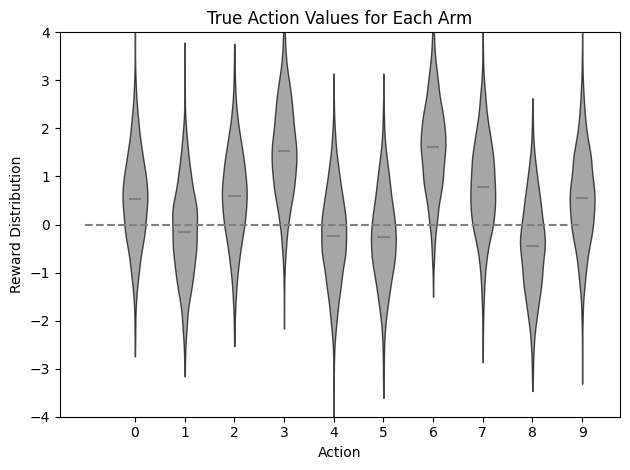

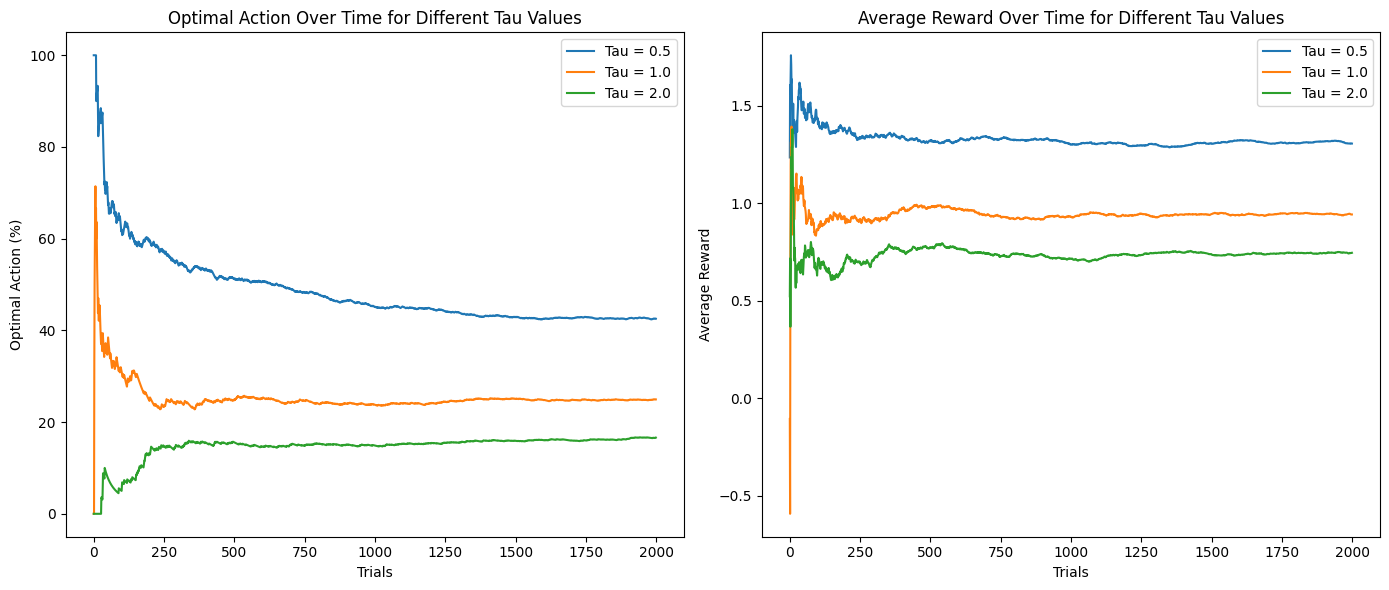

Average reward distribution for tau = 0.5:
Arm 0: 0.5534 average reward
Arm 1: -0.4251 average reward
Arm 2: 0.4819 average reward
Arm 3: 1.5089 average reward
Arm 4: -0.1435 average reward
Arm 5: -0.1620 average reward
Arm 6: 1.5794 average reward
Arm 7: 0.8230 average reward
Arm 8: -1.0421 average reward
Arm 9: 0.4743 average reward


Average reward distribution for tau = 1.0:
Arm 0: 0.5346 average reward
Arm 1: -0.1346 average reward
Arm 2: 0.6288 average reward
Arm 3: 1.5324 average reward
Arm 4: -0.2712 average reward
Arm 5: -0.1971 average reward
Arm 6: 1.5602 average reward
Arm 7: 0.8091 average reward
Arm 8: -0.4751 average reward
Arm 9: 0.4794 average reward


Average reward distribution for tau = 2.0:
Arm 0: 0.4163 average reward
Arm 1: -0.0667 average reward
Arm 2: 0.7071 average reward
Arm 3: 1.6213 average reward
Arm 4: -0.2130 average reward
Arm 5: -0.2261 average reward
Arm 6: 1.6888 average reward
Arm 7: 0.6904 average reward
Arm 8: -0.3555 average reward
Arm 9: 0.5093 

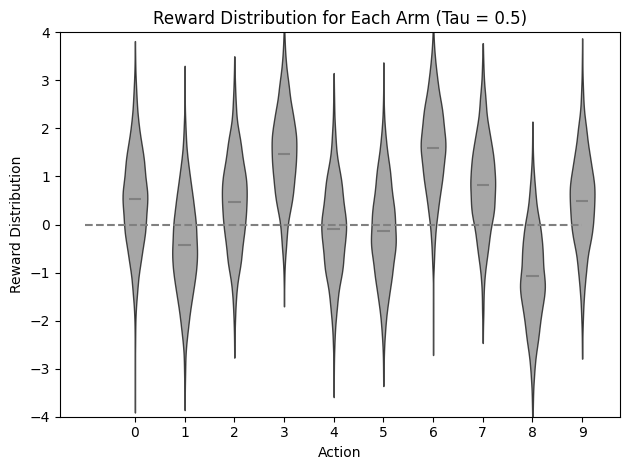

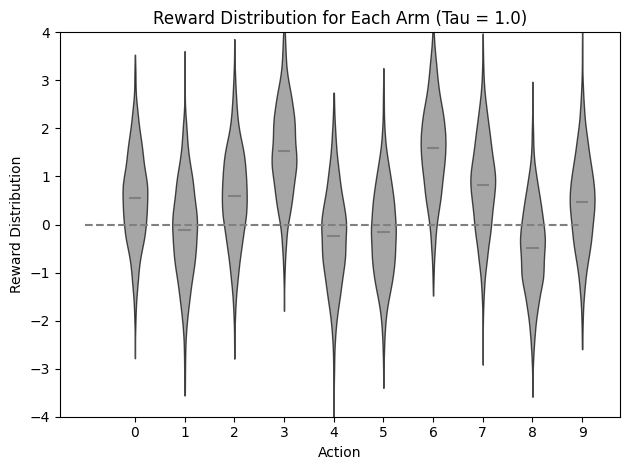

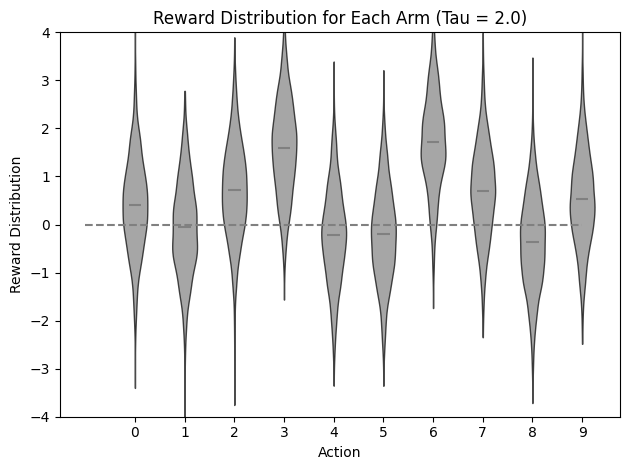

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Setting random seed for reproducibility
np.random.seed(42)

# Parameter setting
n_arms = 10  # number of arms
n_trials = 2000  # number of trials
tau_values = [0.5, 1.0, 2.0]  # List of different tau values to compare

# Step 1: Generate true action values for each arm (q*(a)) from a normal distribution
true_action_values = np.random.normal(0, 1, n_arms)  # Mean = 0, Variance = 1
# Print the true probabilities for each arm
print("True Action Values for Each Arm:")
for arm in range(n_arms):
    print(f"Arm {arm}: {true_action_values[arm]:.4f}")

# Generate the violin plot using actual rewards from the simulation
fig = plt.figure()
ax = fig.add_subplot(111)

# Use rewards from the simulation for the violin plot
reward_samples = np.array([np.random.normal(true_action_values[arm], 1, n_trials) for arm in range(n_arms)]).T

# Create the violin plot
parts = ax.violinplot(reward_samples, showmeans=True, showextrema=False)

# Set color for each violin body
for pc in parts['bodies']:
    pc.set_facecolor('gray')  # Gray color for violins
    pc.set_edgecolor('black')  # Optional: adds border to violins
    pc.set_alpha(0.7)  # Optional: adjust transparency

# Set color for the mean marker
parts['cmeans'].set_color('gray')

# Add a horizontal dashed line at y=0
ax.plot([0, n_arms], [0, 0], color='gray', linestyle='--')

# Set y-axis limits
ax.set_ylim([-4, 4])

# Set x-axis ticks and labels explicitly to start from 0
ax.set_xticks(np.arange(1, n_arms + 1))  # Set ticks to match arm indices starting from 1
ax.set_xticklabels(np.arange(0, n_arms))  # Set labels to start from 0 (for arms)


# Add axis labels
ax.set_xlabel("Action")
ax.set_ylabel("Reward Distribution")
# Add a title for the plot (including epsilon value)
ax.set_title(f"True Action Values for Each Arm")

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

# Initialize a dictionary to store results for each tau value
results = {}

# Tracking reward distribution for each arm
average_reward_distribution = np.zeros((n_arms, len(tau_values)))

for idx, tau_value in enumerate(tau_values):
    # Initialize statistics for wins and trials per arm
    wins = np.zeros(n_arms)
    trials = np.zeros(n_arms)
    optimal_action_counts = np.zeros(n_trials)
    rewards = np.zeros(n_trials)

    total_reward = 0
    for t in range(1, n_trials + 1):
        # Calculate the Softmax probabilities for each arm
        q_values = wins / (trials + 1e-10)  # Estimated values for each arm
        exp_values = np.exp(q_values / tau_value)  # Apply Softmax formula
        probabilities = exp_values / np.sum(exp_values)  # Normalize probabilities

        # Choose the arm based on Softmax probabilities
        chosen_arm = np.random.choice(n_arms, p=probabilities)

        # Step 2: Calculate the reward for the chosen arm
        reward = np.random.normal(true_action_values[chosen_arm], 1)  # Normal distribution with mean q*(a) and variance 1

        # Update statistics
        wins[chosen_arm] += reward
        trials[chosen_arm] += 1
        total_reward += reward

        # Store the rewards and optimal action
        rewards[t - 1] = total_reward
        if chosen_arm == np.argmax(true_action_values):  # Optimal action is the one with the highest q*(a)
            optimal_action_counts[t - 1] = 1  # Count as optimal action

    # Calculate the percentage of optimal actions and average rewards
    optimal_action_percentage = np.cumsum(optimal_action_counts) / (np.arange(1, n_trials + 1)) * 100
    average_rewards = rewards / (np.arange(1, n_trials + 1))

    # Save results for the current tau_value
    results[tau_value] = (optimal_action_percentage, average_rewards)

    # Calculate average reward distribution for each arm
    for arm in range(n_arms):
        if trials[arm] > 0:
            average_reward_distribution[arm, idx] = wins[arm] / trials[arm]  # Calculate average reward

# Plotting results
plt.figure(figsize=(14, 6))

# Plot percentage of Optimal Actions for each tau value
plt.subplot(1, 2, 1)
for tau_value in tau_values:
    plt.plot(results[tau_value][0], label=f"Tau = {tau_value}")
plt.xlabel("Trials")
plt.ylabel("Optimal Action (%)")
plt.title("Optimal Action Over Time for Different Tau Values")
plt.legend()

# Plot average reward for each tau value
plt.subplot(1, 2, 2)
for tau_value in tau_values:
    plt.plot(results[tau_value][1], label=f"Tau = {tau_value}")
plt.xlabel("Trials")
plt.ylabel("Average Reward")
plt.title("Average Reward Over Time for Different Tau Values")
plt.legend()

plt.tight_layout()
plt.show()

# Display average reward distribution for each arm and tau value
for idx, tau_value in enumerate(tau_values):
    print(f"Average reward distribution for tau = {tau_value}:")
    for arm in range(n_arms):
        print(f"Arm {arm}: {average_reward_distribution[arm, idx]:.4f} average reward")
    print("\n")

# Plotting reward distribution for each arm using violin plot for each tau value
for idx, tau_value in enumerate(tau_values):
    fig = plt.figure()
    ax = fig.add_subplot(111)

    # Generate reward samples using the average reward distribution
    reward_samples = np.array([np.random.normal(average_reward_distribution[arm, idx], 1, n_trials) for arm in range(n_arms)]).T

    # Create the violin plot
    parts = ax.violinplot(reward_samples, showmeans=True, showextrema=False)

    # Set color for each violin body
    for pc in parts['bodies']:
        pc.set_facecolor('gray')  # Gray color for violins
        pc.set_edgecolor('black')  # Optional: adds border to violins
        pc.set_alpha(0.7)  # Optional: adjust transparency

    # Set color for the mean marker
    parts['cmeans'].set_color('gray')

    # Add a horizontal dashed line at y=0
    ax.plot([0, n_arms], [0, 0], color='gray', linestyle='--')

    # Set y-axis limits
    ax.set_ylim([-4, 4])

    # Set x-axis ticks and labels explicitly to start from 0
    ax.set_xticks(np.arange(1, n_arms + 1))  # Set ticks to match arm indices starting from 1
    ax.set_xticklabels(np.arange(0, n_arms))  # Set labels to start from 0 (for arms)

    # Add axis labels
    ax.set_xlabel("Action")
    ax.set_ylabel("Reward Distribution")
    # Add a title for the plot (including tau value)
    ax.set_title(f"Reward Distribution for Each Arm (Tau = {tau_value})")

    # Adjust layout and show the plot
    plt.tight_layout()
    plt.show()
